In [1]:
!pip install dlib

  Using cached dlib-19.24.6.tar.gz (3.4 MB)
  Preparing metadata (setup.py) ... done
anceled
ERROR: Operation cancelled by user


In [5]:
!wget -O downloaded_image.jpg https://i.namu.wiki/i/0CgYU5VSFufGTtlw5sCu5PmNBSjncpe2DgV1dPHEdEvtNZu3cA56tvgxuLY4QU-G0izTGl35pTv7Ig-zG6sgyA.webp


--2024-08-21 12:18:27--  https://i.namu.wiki/i/0CgYU5VSFufGTtlw5sCu5PmNBSjncpe2DgV1dPHEdEvtNZu3cA56tvgxuLY4QU-G0izTGl35pTv7Ig-zG6sgyA.webp
Resolving i.namu.wiki (i.namu.wiki)... 104.16.219.109, 104.16.218.109, 2606:4700::6810:db6d, ...
Connecting to i.namu.wiki (i.namu.wiki)|104.16.219.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116094 (113K) [image/webp]
Saving to: ‘downloaded_image.jpg’

downloaded_image.jp 100%[===================>] 113.37K  --.-KB/s    in 0.03s   

2024-08-21 12:18:27 (3.83 MB/s) - ‘downloaded_image.jpg’ saved [116094/116094]



# 이미지 처리 기초

## 이미지 확인

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

image = cv2.imread('like_lenna.png', cv2.IMREAD_GRAYSCALE)
if image is not None:
    print("이미지를 읽어왔습니다.")
else:
    print("이미지를 읽어오지 못했습니다.")
print(f"변수 타입: {type(image)}")

이미지를 읽어오지 못했습니다.
변수 타입: <class 'NoneType'>


[ WARN:0@0.007] global loadsave.cpp:241 findDecoder imread_('like_lenna.png'): can't open/read file: check file path/integrity


In [ ]:
image.shape

In [ ]:
# 로컬 환경에서의 이미지 출력

# cv2.imshow(image)

plt.imshow(image)

## 이미지 만들기

In [ ]:
#검은색 이미지

# 검은색 이미지 생성 (예: 512x512 크기)
black_image = np.zeros((512, 512, 3), dtype=np.uint8)

# 이미지 표시
plt.imshow(black_image)

In [ ]:
# 흰색 이미지 생성 (예: 512x512 크기)


# 이미지 표시


In [ ]:
# 회색 이미지 생성 (예: 512x512 크기)


# 이미지 표시


In [ ]:
# 가우시안 노이즈 이미지 생성 (예: 512x512 크기)
mean = 0
sigma = 1
gaussian_noise = np.random.normal(mean, sigma, (512, 512, 3)).astype(np.uint8)

# 이미지 표시
plt.imshow(gaussian_noise, cmap='gray')

In [ ]:
# 가우시안 노이즈 이미지 생성 (예: 512x512 크기)
mean = 0
sigma = 1
gaussian_noise = np.random.normal(mean, sigma, (512, 512, 3)).astype(np.uint8)

# 가우시안 노이즈 이미지 생성 후 0~255 사이로 클리핑
gaussian_noise_image = np.clip(gaussian_noise, 0, 255)

# 이미지 표시
plt.imshow(gaussian_noise_image, cmap='gray')

## 변환

In [ ]:
# 사이즈 변환
image_small = cv2.resize(image,(100,100))
plt.imshow(image_small, cmap='gray')

In [ ]:
new_height = 300
new_width = 300
dst = np.zeros((new_height, new_width), dtype=np.uint8)
cv2.resize(image, (new_width, new_height), dst=dst)
plt.imshow(dst, cmap='gray')

In [ ]:
# 배율로 사이즈 변환
#

plt.imshow(image_big, cmap='gray')

## 반전

In [ ]:
#
plt.imshow(image_fliped, cmap='gray')

In [ ]:
#
plt.imshow(image_fliped, cmap='gray')

## 회전

In [ ]:
height, width = image.shape
#
result = cv2.warpAffine(image, matrix, (width, height))
plt.imshow(result, cmap='gray')

In [ ]:
#
result = cv2.warpAffine(image,matrix,(width,height),borderValue=200)
plt.imshow(result, cmap='gray')

## 자르기

In [ ]:
plt.imshow(image[:100,:100], cmap='gray')

In [ ]:
#
plt.imshow(image, cmap='gray')

In [ ]:
# [실습] 위 코드를 이용하여 빈 공간을 검은 색/흰 색으로 만들기

### 도형 그리기

### 선

In [ ]:
space = np.zeros((500, 1000), dtype=np.uint8)
line_color = 255
#
plt.imshow(space, cmap='gray')

### 원

In [ ]:
space = np.zeros((500, 1000), dtype=np.uint8)
color = 255
#
plt.imshow(space, cmap='gray')

### 사각형

In [ ]:
space = np.zeros((768, 1388), dtype=np.uint8)
color = 255
#
plt.imshow(space, cmap='gray')

### 초승달

In [ ]:
space = np.zeros((768, 1388), dtype=np.uint8)
color = 255
#
plt.imshow(space, cmap='gray')

## 이미지 여러 개 같이 그리기

In [ ]:
space = np.zeros((768, 1388), dtype=np.uint8)
color = 255
obj1 = np.array([[300, 500], [500, 500], [400, 600], [200, 600]])
obj2 = np.array([[600, 500], [800, 500], [700, 200]])
space = cv2.polylines(space, [obj1], True, color, 3)
space = cv2.fillPoly(space, [obj2], color, 1)

plt.imshow(space, cmap='gray')

### 격자 그리기

In [ ]:
space = np.zeros((768, 1388), dtype=np.uint8)

# 격자 간격 및 색상 설정
grid_spacing = 50
grid_color = 225

# 이미지에 격자 그리기
for x in range(0, space.shape[1], grid_spacing):
    cv2.line(space, (x, 0), (x, space.shape[0]), grid_color, 1)

for y in range(0, space.shape[0], grid_spacing):
    cv2.line(space, (0, y), (space.shape[1], y), grid_color, 1)

plt.imshow(space, cmap='gray')

In [ ]:
# 얼굴 위에 네모 그리기



In [ ]:
# 얼굴 위에 네모 그리기
image = cv2.imread('like_lenna.png', cv2.IMREAD_GRAYSCALE)

# 네모 박스를 그리기
color = 255  # 흰색
start_point = (100, 65)  # 네모 박스의 시작 좌표
end_point = (185, 165)  # 네모 박스의 끝 좌표
thickness = 1  # 네모 박스의 두께

# 네모 박스를 이미지에 추가
image_with_box = cv2.rectangle(image.copy(), start_point, end_point, color, thickness)

# 이미지를 표시
plt.imshow(image_with_box, cmap='gray')


## 컬러 이미지 불러오기

In [ ]:
img_path = "/kaggle/input/image-opencv-tutorial/pizza.jpg"
pizza = cv2.imread(img_path)

plt.imshow(pizza)

In [ ]:
#

### 컬러 이미지 만들기

In [ ]:
# 빨간색 이미지 만들기
red_image = np.zeros((100, 100, 3), dtype=np.uint8)
red_image[:, :, 0] = 255
plt.imshow(red_image)

In [ ]:
# 초록색 이미지 만들기
green_image = np.zeros((100, 100, 3), dtype=np.uint8)
green_image[:, :, 1] = 255
plt.imshow(green_image)

In [ ]:
# 파란색 이미지 만들기
blue_image = np.zeros((100, 100, 3), dtype=np.uint8)
blue_image[:, :, 2] = 255
plt.imshow(blue_image)

## 추가 과제
- 보라색 이미지 만들기
- 갈색 이미지 만들기
- 금색 이미지 만들기

In [ ]:
# 가우시안 노이즈 이미지 생성 (예: 512x512 크기)
# 

## 이미지 저장

In [ ]:
cv2.imwrite("pizza.png", pizza)

### 흑백 변환

In [ ]:
# BGR 이미지를 HSV로 변환
pizza_bw = cv2.cvtColor(pizza, cv2.COLOR_BGR2GRAY)

plt.imshow(pizza_bw, cmap='gray')

### HSV 변환

In [ ]:
# BGR 이미지를 HSV로 변환
#

plt.imshow(pizza_hsv)

## 비디오

In [ ]:
# 비디오 파일 열기
video_path = '/kaggle/input/image-opencv-tutorial/glowing_beach.mp4'  # 비디오 파일 경로
cap = cv2.VideoCapture(video_path)

# 비디오가 정상적으로 열렸는지 확인
if not cap.isOpened():
    print("Error: Could not open video.")

### 프레임 별 비디오 처리하기

In [ ]:
img_frames = []

while True:
    ret, frame = cap.read()
    
    if not ret:
        break  # 비디오의 끝에 도달했거나 읽기에 실패한 경우 루프 종료
    # 여기에서 프레임을 처리합니다 (예: 이미지를 RGB로 변환)
    img_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # 처리된 프레임을 리스트에 추가
    img_frames.append(img_frame)

# 모든 자원 해제
cap.release()

In [ ]:
len(img_frames)

In [ ]:
# 이미지 표시
#

# 스티커 카메라 만들기

이번 시간에는 Object Detection 기술을 활용하여 얼굴의 위치를 탐지해 보겠습니다. 빠른 구현을 위해, 별도의 학습 과정 없이 공개된 패키지를 사용하겠습니다.  

dlib의 face detector는 HOG(Histogram of Oriented Gradients)와 SVM(Support Vector Machine)을 이용하여 얼굴을 탐지합니다.  

HOG는 이미지에서 색상의 변화 패턴을 나타내는 기법으로, 딥러닝이 보편화되기 전까지 다양한 용도로 사용되었습니다. 이미지에서 단순한 색상 정보만으로는 처리할 수 있는 작업이 제한적이었기 때문에, 색상의 변화를 계산하는 HOG는 매우 유용한 기술이었습니다. 이 기술 덕분에 이미지에서 물체의 특징을 잘 포착할 수 있었으며, 2000년대 초반의 얼굴 인식 기반 카메라 초점 조절 기능 등에도 널리 응용되었습니다.

![](https://iq.opengenus.org/content/images/2019/07/hog-vis.png)

HOG 시각화 이미지를 보면 사람의 형체가 어느 정도 식별되는 것을 알 수 있습니다.

SVM은 선형 분류기의 일종으로, 이미지를 다차원 공간에서 하나의 벡터로 표현한다고 가정할 때, 여러 이미지는 여러 벡터로 나타낼 수 있습니다. SVM은 이러한 벡터들을 적절하게 구분하는 방법을 제공하며, 여기서는 얼굴 여부를 구분하는 데 사용됩니다.

단순한 이미지의 색상 정보만으로는 SVM의 성능이 제한될 수 있습니다. 그러나 이미지가 HOG를 통해 벡터로 변환되면, SVM은 훨씬 더 효과적으로 작동합니다.

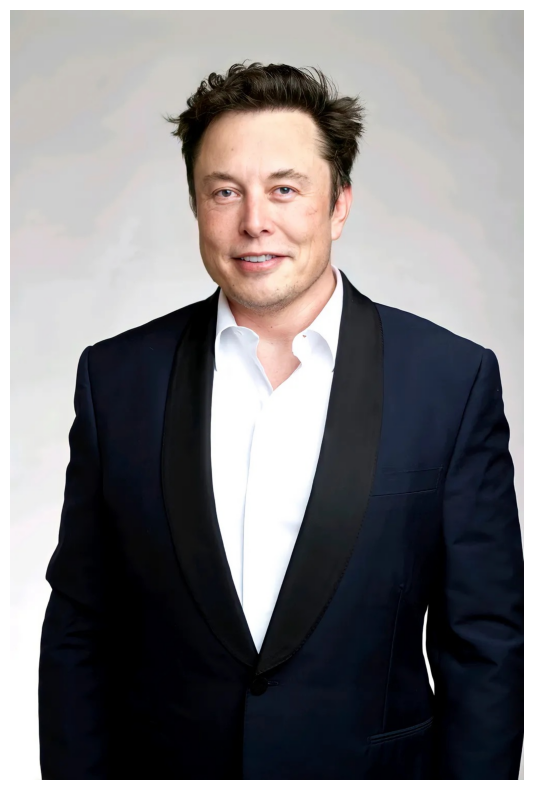

In [21]:
elon = cv2.imread('images_opencv/elonmusk.jpeg')
elon = cv2.cvtColor(elon, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(19, 10))
plt.imshow(elon)
plt.axis('off')
plt.show()

In [22]:
import dlib
detector_hog = dlib.get_frontal_face_detector()

## 바운딩 박스 추출

[Image Pyramids](https://opencv-python.readthedocs.io/en/latest/doc/14.imagePyramid/imagePyramid.html)

In [23]:
dlib_rects = detector_hog(elon, 1)   # (image, num of image pyramid)

In [24]:
dlib_rects

rectangles[[(312, 241) (633, 562)]]

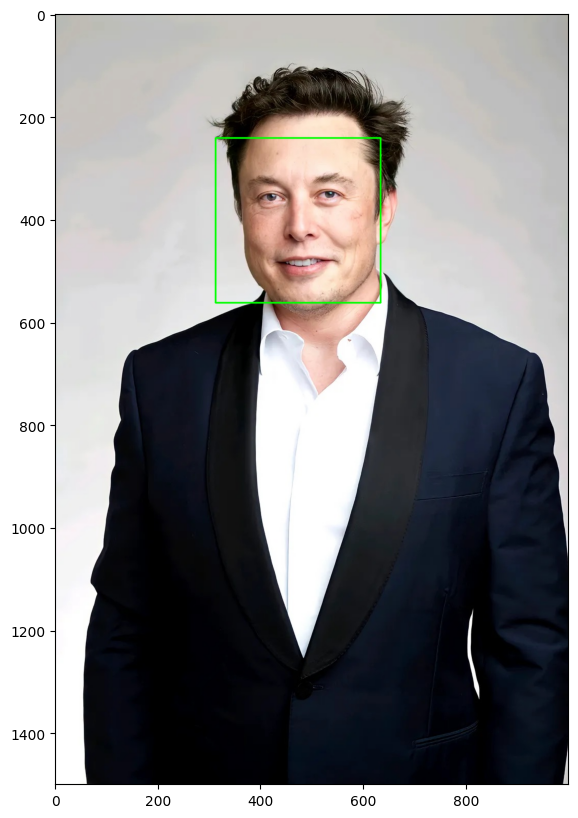

In [25]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(elon, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

plt.figure(figsize=(19, 10))
plt.imshow(elon)
plt.show()

## Face landmark 추출

이미지 상에서 주요 포인트나 객체를 탐지하는 과정을 Object keypoint detection이라 합니다. 

얼굴에서 이목구비의 주요 포인트들을 facial landmark라 하며, 이들을 찾는 과정을 face landmark detection이라 합니다. Face landmark detection은 Object keypoint Detection의 대표적인 예시 중 하나입니다.

Dlib에서는 이목구비에서 중요한 키포인트 68개를 찾으며, 그 일반적인 위치와 번호는 아래 그림과 같습니다.

![content img](https://d3s0tskafalll9.cloudfront.net/media/original_images/E-8-8.png)

In [9]:
!wget -nd https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat

--2024-08-21 14:26:59--  https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat [following]
--2024-08-21 14:26:59--  https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99693937 (95M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat.2’

shape_predictor_68_ 100%[===================>]  95.08M  17.4MB/s    in 5.5s    

2024-08-21 14:27:05 

In [26]:
weight_path = 'shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(weight_path)

`landmark_predictor` 는 `RGB 이미지`와 `dlib.rectangle`을 입력 받아 `dlib.full_object_detection` 를 반환합니다.

In [27]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = predictor(elon, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


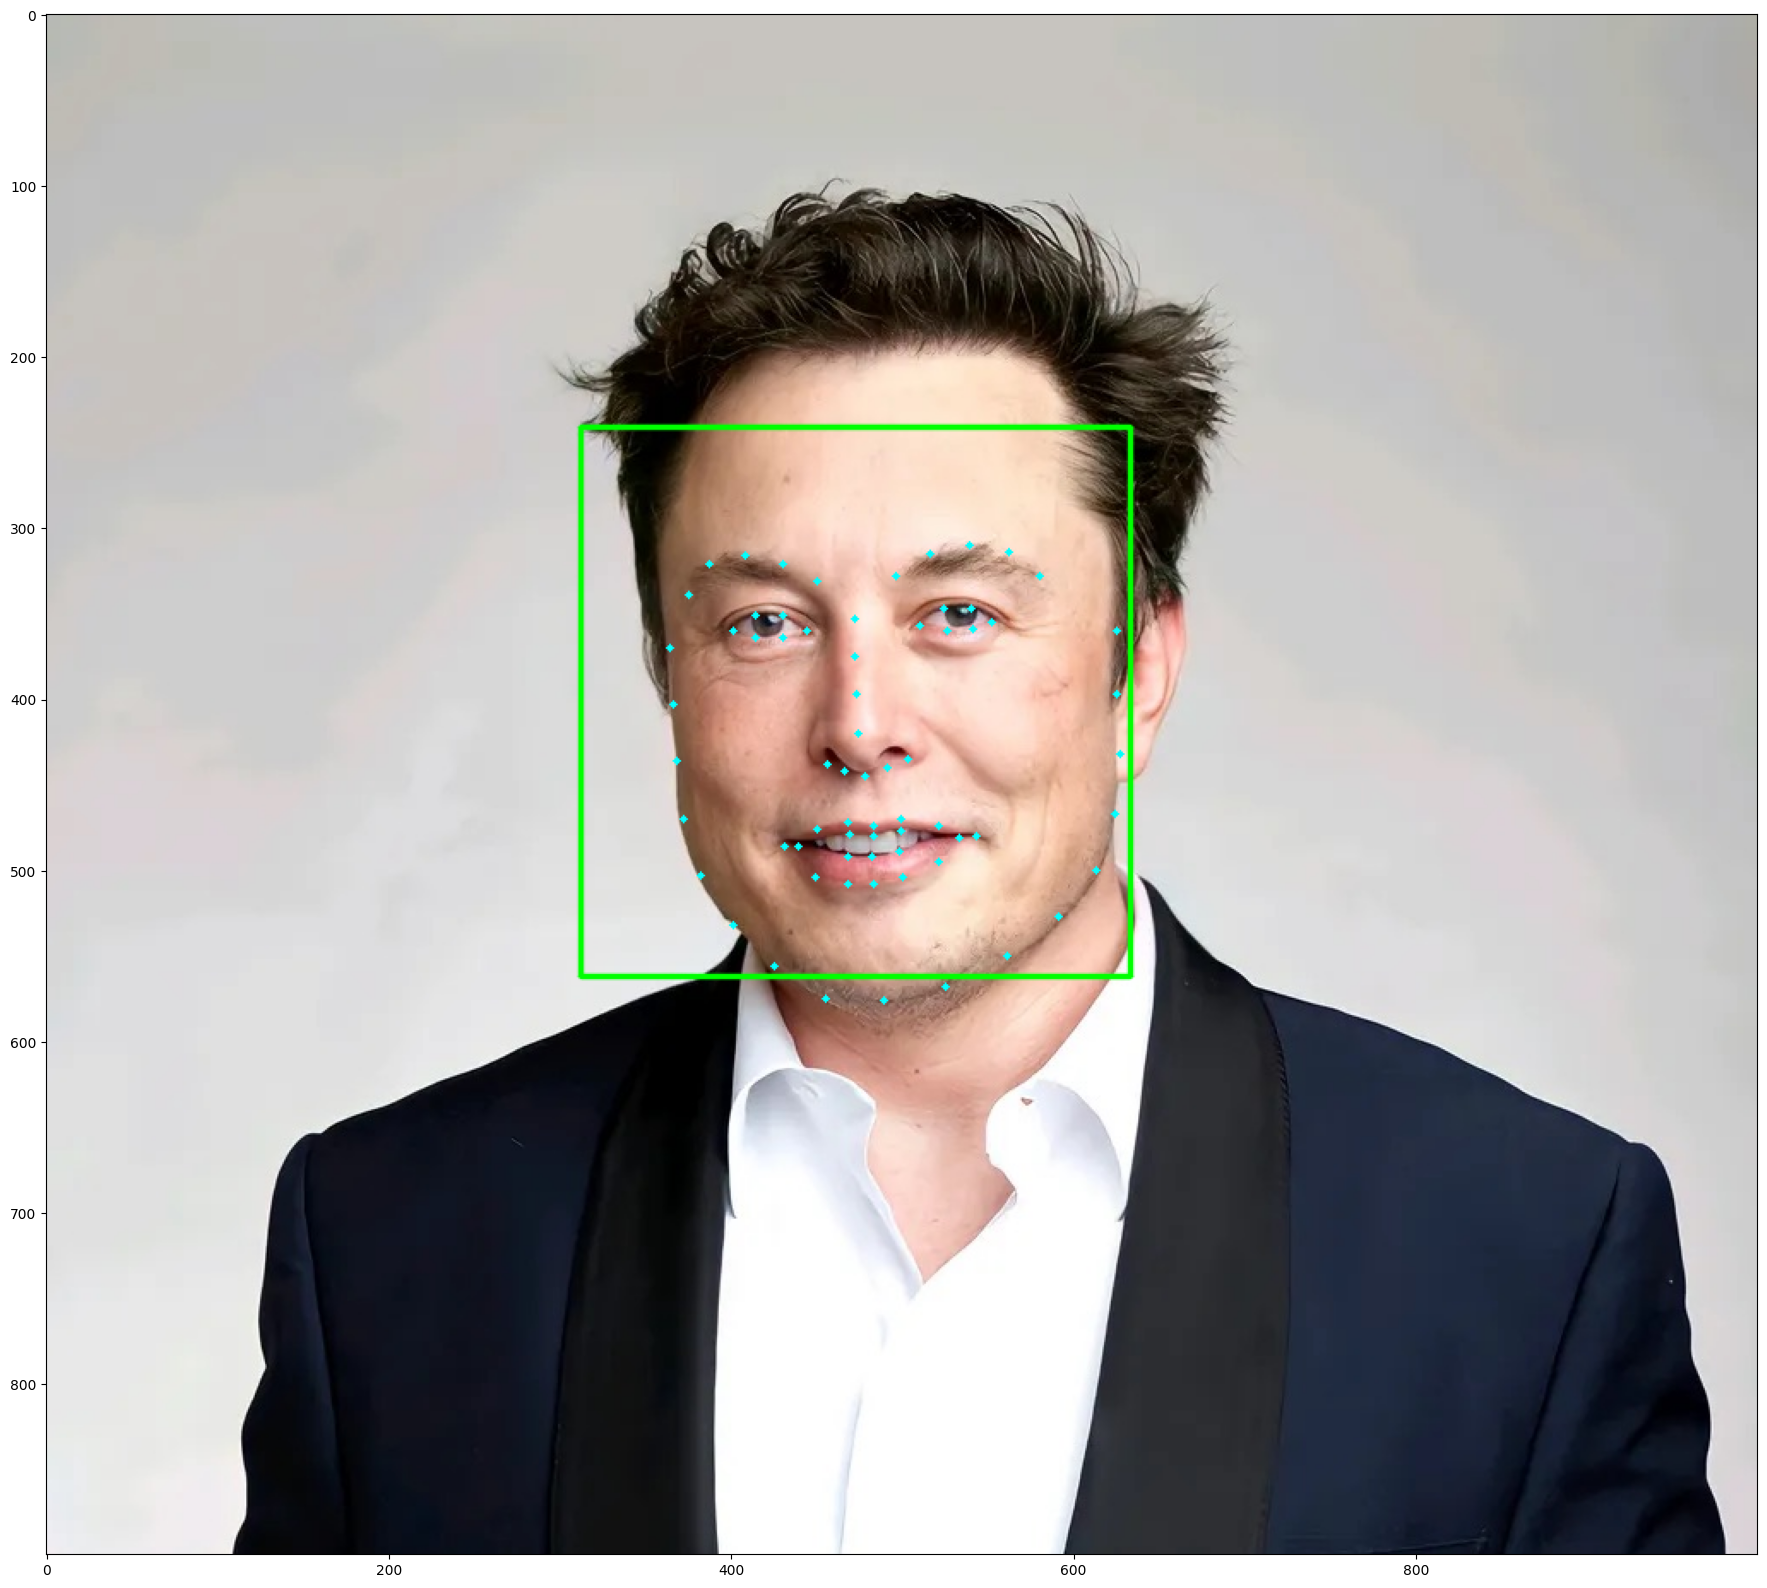

In [28]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(elon, point, 2, (0, 255, 255), -1)

plt.figure(figsize=(38, 20))
plt.imshow(elon[:900, :, :])
plt.show()

## 스티커 붙이기

아래 왕관을 인물의 얼굴에 합치도록 하겠습니다.

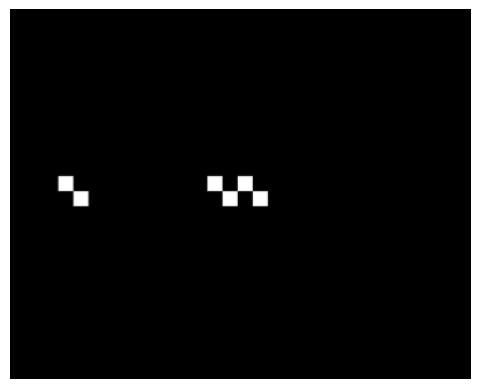

In [29]:
# sunglasses = cv2.imread('/kaggle/input/image-opencv-tutorial/deal_with_it.png')
crown = cv2.imread('images_opencv/deal_with_it.png')  # 알파 채널 포함
crown = cv2.cvtColor(crown, cv2.COLOR_BGR2RGB)

plt.imshow(crown)
plt.axis('off')
plt.show()

In [30]:
crown.shape

(297, 370, 3)

인물에게 왕관을 씌워주기 위해선 크기 조정이 필요합니다. 스티커의 크기를 조정한 뒤 인물 사진 위에 덧대어 그려보겠습니다.

In [31]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(474, 420)
(x,y) : (474,259)
(w,h) : (322,322)


In [32]:
crown = cv2.resize(crown, (w,h))
print(crown.shape)

(322, 322, 3)


왕관 스티커가 머리에 붙을 경우, 좌표를 계산해봅시다.

In [33]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (313,-63)


좌표가 음수 값이 나온다는 것은 왕관 스티커가 이미지의 규격을 벗어난다는 뜻입니다. 이를 재조정하는 과정이 필요합니다.

In [34]:
if refined_x < 0:
    crown = crown[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    crown = crown[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (313,0)


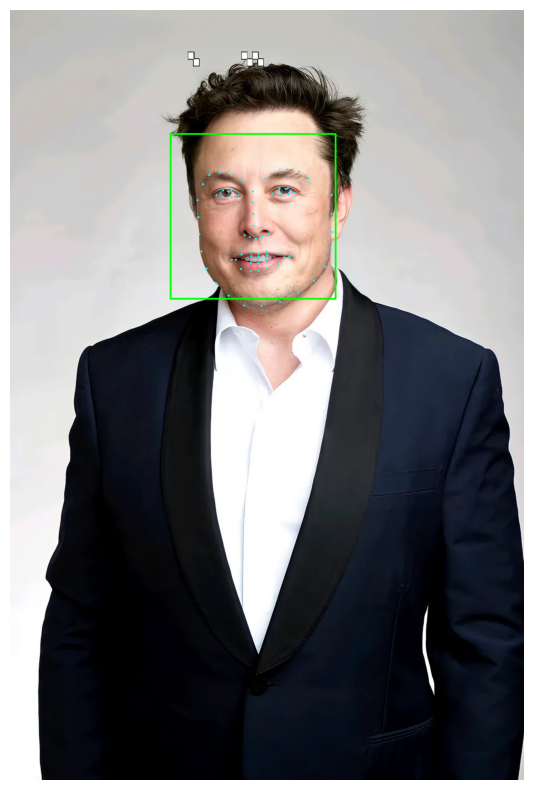

In [35]:
sticker_area = elon[refined_y:refined_y+crown.shape[0], refined_x:refined_x+crown.shape[1]]
elon[refined_y:refined_y+crown.shape[0], refined_x:refined_x+crown.shape[1]] = \
    np.where(crown==0,sticker_area,crown).astype(np.uint8)

plt.figure(figsize=(19, 10))
plt.imshow(elon)
plt.axis('off')
plt.show()

# 심화 프로젝트

추가로 제공된 이미지 중 `sunglasses.png`, `deal_with_it.png` 스티커를 인물의 이미지에 씌워보세요. 또한 여러 인물들의 사진에 대해서도 얼굴의 키포인트를 찾고 스티커를 붙여보세요.

![](https://i.namu.wiki/i/0CgYU5VSFufGTtlw5sCu5PmNBSjncpe2DgV1dPHEdEvtNZu3cA56tvgxuLY4QU-G0izTGl35pTv7Ig-zG6sgyA.webp)